In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
train = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/train.csv')
train.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159561,ffd2e85b07b3c7e4,"""\nNo he did not, read it again (I would have ...",0,0,0,0,0,0
159562,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [4]:
train.toxic.value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [ ]:
tokenizer = TweetTokenizer(strip_handles=True)
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
corpus = []




def clean(tweet):

    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)
    tweet = re.sub(r"donå«t", "do not", tweet)

    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    # Urls
    tweet = re.sub(r"http\S+", "", tweet)
    # Numbers
    tweet = re.sub(r'[0-9]', '', tweet)
    # Eliminating the mentions
    tweet = re.sub("(@[A-Za-z0-9_]+)","", tweet)
    # Remove punctuation and special chars (keep '!')
    for p in string.punctuation.replace('!', ''):
        tweet = tweet.replace(p, '')

    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')

    # Tokenize
    tweet_words = tokenizer.tokenize(tweet)

    # Eliminating the word if its length is less than 3
    tweet = [w for w in tweet_words if len(w)>2]

    # remove stopwords
    tweet = [w.lower() for w in tweet if not w in stop_words]

    corpus.append(tweet)

    # join back
    tweet = ' '.join(tweet)


    return tweet




data train schap : (159571, 8)
data train columns : Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


In [9]:
variable_name = ""
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

def convert_abbrev_in_text(tweet):
    t=[]
    words=tweet.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t)

## dataset divise et reduirt en donnee ( 3000,3000 )


In [8]:

from sklearn.utils import resample
# Separate toxic comments from non-toxic comments
def toxicity(data,number_toxic,number_non_toxic):
    toxic_comments = data[data['toxic']==1].sample(n=number_toxic, random_state=42)
    non_toxic_comments = data[data['toxic']==0].sample(n=number_non_toxic, random_state=42)
    num_toxic_samples = len(toxic_comments)
    num_non_toxic_samples = len(non_toxic_comments)
    num_keep = num_toxic_samples
    non_toxic_sampled = resample(non_toxic_comments, replace=True, n_samples=num_keep, random_state=42) #undersampling
    data_df = pd.concat([toxic_comments, non_toxic_sampled])
    return data_df


In [9]:
train_df = toxicity(train,number_toxic=3000,number_non_toxic=3000)

### Bag of Word pour tester les models classiques de machine learning

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Your Code
count_vector = CountVectorizer()
bag = count_vector.fit_transform(train_df["comment_text"])
X = bag.toarray().astype(np.uint8)
y= train_df[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']].values

In [11]:
bag.shape

(6000, 20658)

#### Random forest

In [12]:
count_vector = CountVectorizer()
bag = count_vector.fit_transform(train_df["comment_text"])
X = bag.toarray().astype(np.uint8)
y= train_df[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']].values
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=42)
#lr = OneVsRestClassifier(LogisticRegression())
rf_10 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
# Fit the model to the training data
rf_10.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = rf_10.predict(X_validation)


In [13]:
print("Random Forest classifier Accuracy %.3f" %metrics.accuracy_score(y_validation, y_pred))

Random Forest classifier Accuracy 0.576


In [14]:
print(f"Random Forest classifier AUC_ROC : {metrics.roc_auc_score(y_validation, y_pred)}")

Random Forest classifier AUC_ROC : 0.6209428549258994


In [15]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       769
           1       0.46      0.08      0.13        79
           2       0.80      0.49      0.61       394
           3       0.00      0.00      0.00        18
           4       0.79      0.34      0.48       382
           5       0.50      0.01      0.02        85

   micro avg       0.85      0.50      0.63      1727
   macro avg       0.58      0.27      0.34      1727
weighted avg       0.80      0.50      0.60      1727
 samples avg       0.34      0.27      0.28      1727



In [16]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy']
}

# Create a RandomForestClassifier object
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'criterion': 'entropy', 'n_estimators': 100}
Best accuracy score:  0.6166666666666666


#### Logistic Regression ( OneVSRest )

In [ ]:
lr = OneVsRestClassifier(LogisticRegression())
# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = lr.predict(X_validation)

In [ ]:
print("Logistic regression Accuracy %.3f" %metrics.accuracy_score(y_validation, y_pred))

Logistic regression Accuracy 0.677


In [ ]:
print(f"Logistic regression AUC_ROC : {metrics.roc_auc_score(y_validation, y_pred)}")

Logistic regression AUC_ROC : 0.722706742844173


In [ ]:
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       769
           1       0.42      0.25      0.31        79
           2       0.88      0.73      0.80       394
           3       0.27      0.17      0.21        18
           4       0.76      0.63      0.69       382
           5       0.53      0.20      0.29        85

   micro avg       0.86      0.72      0.79      1727
   macro avg       0.64      0.48      0.54      1727
weighted avg       0.84      0.72      0.77      1727
 samples avg       0.42      0.38      0.38      1727



### **Tokenisation pour tester les models de Deep Learning (ANN,RNN)**

##### ANN with word embedding only

In [ ]:


import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Tokenize the comments
y= train_df[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']]
X=train_df["comment_text"]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=42)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
max_sequence_length = max(len(s) for s in sequences)
word_index = tokenizer.word_index

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Define the model
model =Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 128,input_length=max_sequence_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Define the callbacks
callbacks = [
    EarlyStopping(patience=5),
    ModelCheckpoint('best_model_ann1.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
]




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1250, 128)         2343936   
                                                                 
 flatten (Flatten)           (None, 160000)            0         
                                                                 
 dense (Dense)               (None, 64)                10240064  
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 12,584,390
Trainable params: 12,584,390
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model with the callbacks
history = model.fit(X, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)



# Evaluate the model on a holdout set
X_test = tokenizer.texts_to_sequences(X_validation)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)
y_test = y_validation
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print("Test accuracy: %.2f%%" % (acc*100))

Epoch 1/10
113/113 [==============================] - ETA: 0s - loss: 0.3764 - accuracy: 0.9306
Epoch 1: val_loss improved from inf to 0.29818, saving model to best_model_ann1.h5
113/113 [==============================] - 14s 114ms/step - loss: 0.3764 - accuracy: 0.9306 - val_loss: 0.2982 - val_accuracy: 0.9789
Epoch 2/10
113/113 [==============================] - ETA: 0s - loss: 0.2281 - accuracy: 0.9767
Epoch 2: val_loss improved from 0.29818 to 0.23537, saving model to best_model_ann1.h5
113/113 [==============================] - 12s 107ms/step - loss: 0.2281 - accuracy: 0.9767 - val_loss: 0.2354 - val_accuracy: 0.9900
Epoch 3/10
113/113 [==============================] - ETA: 0s - loss: 0.1450 - accuracy: 0.9878
Epoch 3: val_loss improved from 0.23537 to 0.23403, saving model to best_model_ann1.h5
113/113 [==============================] - 12s 103ms/step - loss: 0.1450 - accuracy: 0.9878 - val_loss: 0.2340 - val_accuracy: 0.9900
Epoch 4/10
113/113 [==============================] -

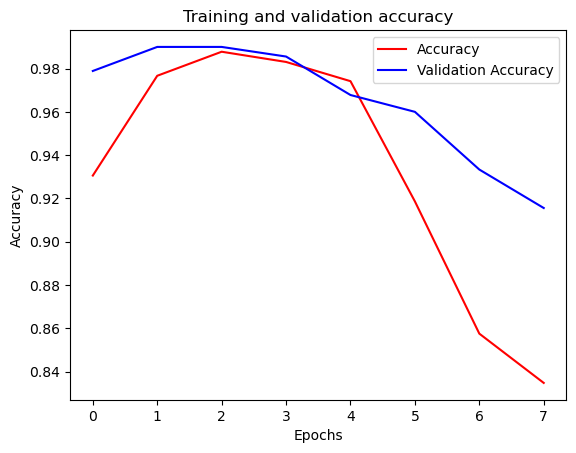

<Figure size 640x480 with 0 Axes>

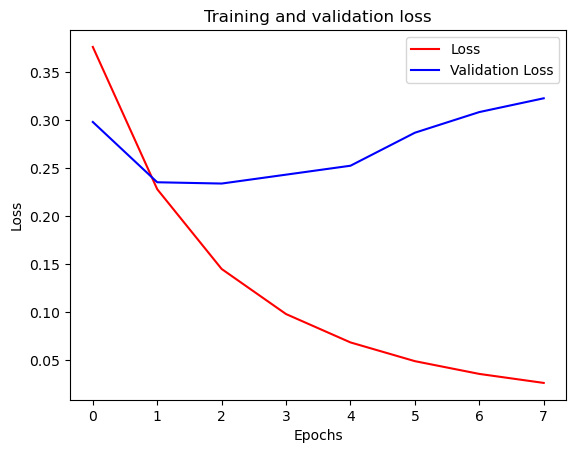

<Figure size 640x480 with 0 Axes>

In [ ]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
plt.show()

##### RNN (with word embbeding + LSTM)

In [ ]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
# Tokenize the comments
y= train_df[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']]
X=train_df["comment_text"]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=42)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
max_sequence_length = max(len(s) for s in sequences)
word_index = tokenizer.word_index

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Define the model
model =Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 128,input_length=max_sequence_length),
    LSTM(units=64),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the callbacks
callbacks = [
    EarlyStopping(patience=6),
    ModelCheckpoint('best_model_rnn1.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
]


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1250, 128)         2343936   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 2,393,734
Trainable params: 2,393,734
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Train the model with the callbacks
history = model.fit(X, y_train, epochs=8, batch_size=32, validation_split=0.2, callbacks=callbacks)

# Evaluate the model on a holdout set
X_test = tokenizer.texts_to_sequences(X_validation)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)
y_test = y_validation
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print("Test accuracy: %.2f%%" % (acc*100))


Epoch 1/8
113/113 [==============================] - ETA: 0s - loss: 0.4153 - accuracy: 0.9719
Epoch 1: val_loss improved from inf to 0.35769, saving model to best_model_rnn1.h5
113/113 [==============================] - 146s 1s/step - loss: 0.4153 - accuracy: 0.9719 - val_loss: 0.3577 - val_accuracy: 0.9933
Epoch 2/8
113/113 [==============================] - ETA: 0s - loss: 0.2999 - accuracy: 0.9947
Epoch 2: val_loss improved from 0.35769 to 0.24394, saving model to best_model_rnn1.h5
113/113 [==============================] - 141s 1s/step - loss: 0.2999 - accuracy: 0.9947 - val_loss: 0.2439 - val_accuracy: 0.9933
Epoch 3/8
113/113 [==============================] - ETA: 0s - loss: 0.1866 - accuracy: 0.9942
Epoch 3: val_loss improved from 0.24394 to 0.22584, saving model to best_model_rnn1.h5
113/113 [==============================] - 140s 1s/step - loss: 0.1866 - accuracy: 0.9942 - val_loss: 0.2258 - val_accuracy: 0.9933
Epoch 4/8
113/113 [==============================] - ETA: 0s -

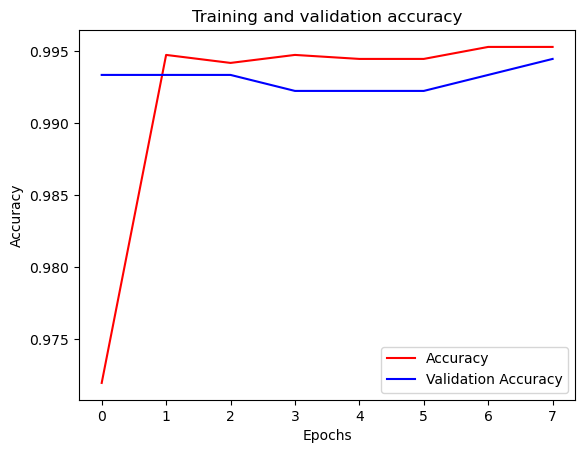

<Figure size 640x480 with 0 Axes>

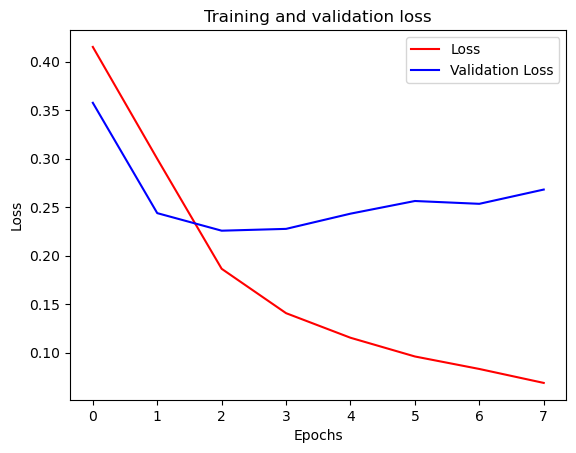

<Figure size 640x480 with 0 Axes>

In [ ]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
plt.show()

#### RNN with word embedding + LSTM ( loss_weights parameter added )

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight



# Tokenize the comments
y= train_df[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']]
X=train_df["comment_text"]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=42)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
max_sequence_length = max(len(s) for s in sequences)
word_index = tokenizer.word_index

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Define the model
model =Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 80,input_length=max_sequence_length),
    LSTM(units=64),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
loss_weights=1-np.sum(y,axis=0)/y.shape[0]
loss_weights=loss_weights.values
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam',loss_weights=loss_weights, metrics=['accuracy'])

# Define the callbacks
callbacks = [
    EarlyStopping(patience=6),
    ModelCheckpoint('best_model_rnn2.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
]



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1250, 80)          1464960   
                                                                 
 lstm_1 (LSTM)               (None, 64)                37120     
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1,502,470
Trainable params: 1,502,470
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Train the model with the callbacks
history = model.fit(X, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)

# Evaluate the model on a holdout set
X_test = tokenizer.texts_to_sequences(X_validation)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)
y_test = y_validation
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print("Test accuracy: %.2f%%" % (acc*100))

Epoch 1/10
113/113 [==============================] - ETA: 0s - loss: 0.3424 - accuracy: 0.9611
Epoch 1: val_loss improved from inf to 0.27759, saving model to best_model_rnn2.h5
113/113 [==============================] - 133s 1s/step - loss: 0.3424 - accuracy: 0.9611 - val_loss: 0.2776 - val_accuracy: 0.9933
Epoch 2/10
113/113 [==============================] - ETA: 0s - loss: 0.2175 - accuracy: 0.9936
Epoch 2: val_loss improved from 0.27759 to 0.19186, saving model to best_model_rnn2.h5
113/113 [==============================] - 122s 1s/step - loss: 0.2175 - accuracy: 0.9936 - val_loss: 0.1919 - val_accuracy: 0.9933
Epoch 3/10
113/113 [==============================] - ETA: 0s - loss: 0.1459 - accuracy: 0.9947
Epoch 3: val_loss improved from 0.19186 to 0.18950, saving model to best_model_rnn2.h5
113/113 [==============================] - 129s 1s/step - loss: 0.1459 - accuracy: 0.9947 - val_loss: 0.1895 - val_accuracy: 0.9933
Epoch 4/10
113/113 [==============================] - ETA: 

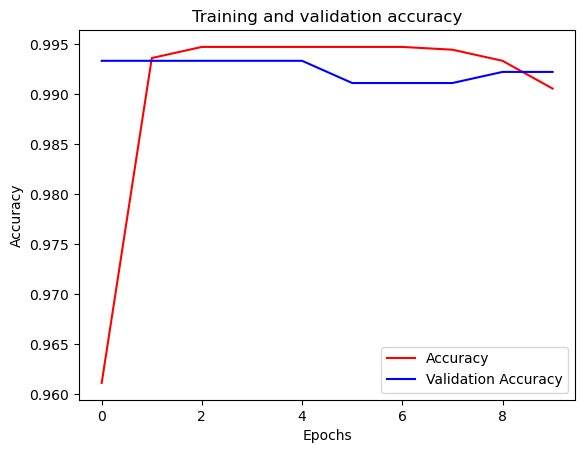

<Figure size 640x480 with 0 Axes>

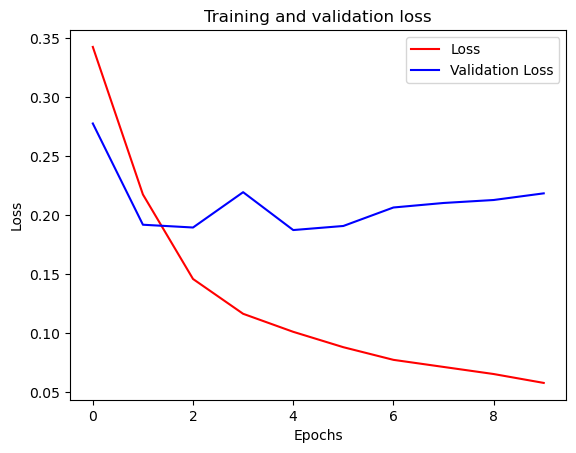

<Figure size 640x480 with 0 Axes>

In [ ]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
plt.show()

### Comparaison des models entrainés sur  pour ce dataset

In [ ]:
y= train_df[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']]
X=train_df["comment_text"]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=42)
y_validation=y_validation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(X_validation.shape)
X_validation = tokenizer.texts_to_sequences(X_validation)
X_validation = pad_sequences(X_validation, maxlen=1250)
'''Nous avons remarqué que c'est une erreur de comparer l'ensemble de nos models pris apres tous les epochs .
Ce que nous voulons c'est de comparer les meilleurs models( ceux qui ont été sauvegardés ) '''
model_ann=tf.keras.models.load_model('best_model_ann1.h5')

y_pred_ann1 = model_ann.predict(X_validation)
y_pred_ann1 = (y_pred_ann1 > 0.5).astype(int)

target_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


model_rnn1=tf.keras.models.load_model('best_model_rnn1.h5')
y_pred_rnn1 = model_rnn1.predict(X_validation)
y_pred_rnn1 = (y_pred_rnn1 > 0.5).astype(int)

model_rnn2=tf.keras.models.load_model('best_model_rnn2.h5')
y_pred_rnn2 = model_rnn2.predict(X_validation)
y_pred_rnn2 = (y_pred_rnn2 > 0.5).astype(int)


print(f"ANN 1 : {classification_report(y_validation, y_pred_ann1, target_names=target_names)}")
print(f"RNN 1 : {classification_report(y_validation, y_pred_rnn1, target_names=target_names)}")
print(f"RNN 2 : {classification_report(y_validation, y_pred_rnn2, target_names=target_names)}")

(1500,)
47/47 [==============================] - 22s 437ms/step
ANN 1 :                precision    recall  f1-score   support

        toxic       0.88      0.83      0.86       769
 severe_toxic       0.71      0.13      0.22        79
      obscene       0.81      0.56      0.66       394
       threat       0.00      0.00      0.00        18
       insult       0.73      0.65      0.69       382
identity_hate       0.00      0.00      0.00        85

    micro avg       0.83      0.65      0.73      1727
    macro avg       0.52      0.36      0.40      1727
 weighted avg       0.77      0.65      0.69      1727
  samples avg       0.39      0.34      0.34      1727

RNN 1 :                precision    recall  f1-score   support

        toxic       0.85      0.91      0.88       769
 severe_toxic       0.00      0.00      0.00        79
      obscene       0.72      0.69      0.70       394
       threat       0.00      0.00      0.00        18
       insult       0.72      0.63  

In [ ]:
X_validation.shape

In [ ]:
X_validation[0:1250].shape

(1250,)

(1250,)

# ** dataset but with a reduced number of vocabulary**

### Bag of Word pour tester les models classiques de machine learning

In [ ]:

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import vstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from io import StringIO

from scipy.sparse import vstack

# Set chunksize for reading data in smaller batches
chunksize = 10000

# Read the data in smaller chunks and transform using CountVectorizer

bag_of_words = None

for chunk in pd.read_csv("C:\\Users\\landr\\Downloads\\ISEN_NLP_2023-main\\ISEN_NLP_2023-main\\data_classification_commentaires_toxiques-20230208T140345Z-001\\data_classification_commentaires_toxiques\\train.csv", chunksize=chunksize):
    count_vector = CountVectorizer(stop_words="english", max_features=5000)
    count_vector.fit(chunk["comment_text"])
    bag = count_vector.transform(chunk["comment_text"])
    if bag_of_words is None:
        bag_of_words = bag
    else:
        bag_of_words = vstack([bag_of_words, bag])

# Convert the bag of words matrix to a dense array for further processing
bag_of_words = bag_of_words.toarray().astype(np.uint8)
X = bag_of_words
y=train[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']].values
X_train, X_validation, y_train, y_validation = train_test_split(X, y)


In [ ]:
bag_of_words.shape

(159571, 5000)

#### Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

rf.fit(X_train, y_train)

y_predict = rf.predict(X_validation)



In [ ]:
print(f"Random Forest classifier AUC_ROC : {metrics.roc_auc_score(y_validation, y_predict)}")

Random Forest classifier AUC_ROC : 0.5998313763064224


In [ ]:
print(classification_report(y_validation, y_predict))

              precision    recall  f1-score   support

           0       0.48      0.36      0.41      3803
           1       0.27      0.13      0.17       411
           2       0.51      0.45      0.48      2116
           3       0.09      0.01      0.02       113
           4       0.42      0.31      0.36      1970
           5       0.13      0.04      0.06       336

   micro avg       0.47      0.34      0.39      8749
   macro avg       0.32      0.22      0.25      8749
weighted avg       0.45      0.34      0.39      8749
 samples avg       0.03      0.03      0.03      8749



#### Logistic Regression ( OneVSRest )

In [ ]:
lr = OneVsRestClassifier(LogisticRegression())
# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = lr.predict(X_validation)

In [ ]:
print(f"Logistic Regression  AUC_ROC : {metrics.roc_auc_score(y_validation, y_predict)}")

Logistic Regression  AUC_ROC : 0.5998313763064224


In [ ]:
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.29      0.40      3803
           1       0.46      0.20      0.28       411
           2       0.64      0.37      0.47      2116
           3       0.11      0.06      0.08       113
           4       0.55      0.26      0.36      1970
           5       0.30      0.12      0.17       336

   micro avg       0.59      0.29      0.39      8749
   macro avg       0.45      0.22      0.29      8749
weighted avg       0.59      0.29      0.39      8749
 samples avg       0.03      0.02      0.02      8749



### **Tokenisation pour tester les models de Deep Learning (ANN,RNN)**

##### ANN with word embedding only

In [ ]:
len(word_index)

18311

In [ ]:
embeddings_index = {};

with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((len(word_index)+1, 100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Tokenize the comments
y= train[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']]
X=train["comment_text"]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=42)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
max_sequence_length = max(len(s) for s in sequences)
word_index = tokenizer.word_index

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Define the model
model =Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 100,input_length=max_sequence_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Define the callbacks
callbacks = [
    EarlyStopping(patience=5),
    ModelCheckpoint('best_model_ann1_v2.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
]




In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1403, 100)         17620700  
                                                                 
 flatten_2 (Flatten)         (None, 140300)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                8979264   
                                                                 
 dense_7 (Dense)             (None, 6)                 390       
                                                                 
Total params: 26,600,354
Trainable params: 8,979,654
Non-trainable params: 17,620,700
_________________________________________________________________


In [ ]:
# Train the model with the callbacks
history = model.fit(X, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)



# Evaluate the model on a holdout set
X_test = tokenizer.texts_to_sequences(X_validation)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)
y_test = y_validation
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print("Test accuracy: %.2f%%" % (acc*100))

Epoch 1/10
2992/2992 [==============================] - ETA: 0s - loss: 0.0927 - accuracy: 0.8423
Epoch 1: val_loss improved from inf to 0.08180, saving model to best_model_ann1_v2.h5
2992/2992 [==============================] - 587s 196ms/step - loss: 0.0927 - accuracy: 0.8423 - val_loss: 0.0818 - val_accuracy: 0.9736
Epoch 2/10
2992/2992 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.9254
Epoch 2: val_loss did not improve from 0.08180
2992/2992 [==============================] - 597s 200ms/step - loss: 0.0704 - accuracy: 0.9254 - val_loss: 0.0831 - val_accuracy: 0.9750
Epoch 3/10
2992/2992 [==============================] - ETA: 0s - loss: 0.0599 - accuracy: 0.9111
Epoch 3: val_loss did not improve from 0.08180
2992/2992 [==============================] - 734s 245ms/step - loss: 0.0599 - accuracy: 0.9111 - val_loss: 0.0833 - val_accuracy: 0.9375
Epoch 4/10
2992/2992 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 0.8705
Epoch 4: val_loss

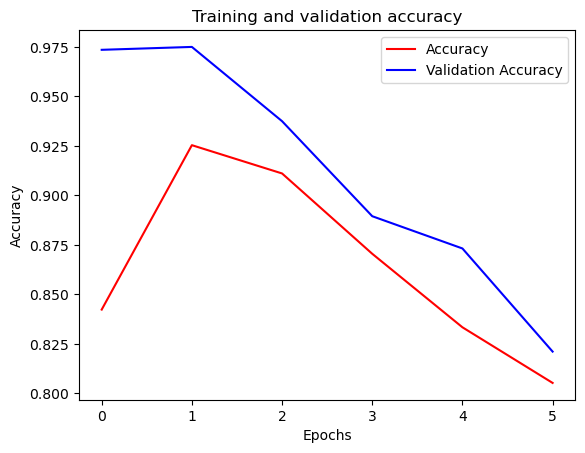

<Figure size 640x480 with 0 Axes>

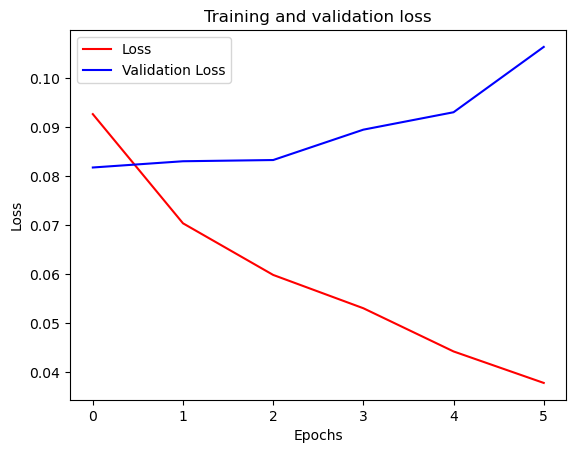

<Figure size 640x480 with 0 Axes>

In [ ]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
plt.show()

In [ ]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
# Tokenize the comments
y= train[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']]
X=train["comment_text"]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=42)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
max_sequence_length = max(len(s) for s in sequences)
word_index = tokenizer.word_index

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Define the model
model =Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 100,input_length=max_sequence_length, weights=[embeddings_matrix], trainable=False),
    LSTM(units=64),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the callbacks
callbacks = [
    EarlyStopping(patience=4),
    ModelCheckpoint('best_model_rnn1_v2.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
]


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1403, 100)         17620700  
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 dense_9 (Dense)             (None, 6)                 390       
                                                                 
Total params: 17,663,330
Trainable params: 42,630
Non-trainable params: 17,620,700
_________________________________________________________________


In [ ]:
# Train the model with the callbacks
history = model.fit(X, y_train, epochs=8, batch_size=32, validation_split=0.2, callbacks=callbacks)



# Evaluate the model on a holdout set
X_test = tokenizer.texts_to_sequences(X_validation)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)
y_test = y_validation
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print("Test accuracy: %.2f%%" % (acc*100))

Epoch 1/8
2992/2992 [==============================] - ETA: 0s - loss: 0.0691 - accuracy: 0.9872
Epoch 1: val_loss improved from inf to 0.05653, saving model to best_model_rnn1_v2.h5
2992/2992 [==============================] - 5471s 2s/step - loss: 0.0691 - accuracy: 0.9872 - val_loss: 0.0565 - val_accuracy: 0.9941
Epoch 2/8
2992/2992 [==============================] - ETA: 0s - loss: 0.0537 - accuracy: 0.9876
Epoch 2: val_loss improved from 0.05653 to 0.05284, saving model to best_model_rnn1_v2.h5
2992/2992 [==============================] - 4260s 1s/step - loss: 0.0537 - accuracy: 0.9876 - val_loss: 0.0528 - val_accuracy: 0.9871
Epoch 3/8
2992/2992 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9818
Epoch 3: val_loss improved from 0.05284 to 0.04947, saving model to best_model_rnn1_v2.h5
2992/2992 [==============================] - 5042s 2s/step - loss: 0.0490 - accuracy: 0.9818 - val_loss: 0.0495 - val_accuracy: 0.9774
Epoch 4/8
2992/2992 [=================

In [ ]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
plt.show()

In [ ]:
# Tokenize the comments
y= train[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']]
X=train["comment_text"]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=42)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
max_sequence_length = max(len(s) for s in sequences)
word_index = tokenizer.word_index

# Pad the sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Define the model
model =Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 100,input_length=max_sequence_length, weights=[embeddings_matrix], trainable=False),
    LSTM(units=64),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
loss_weights=1-np.sum(y,axis=0)/y.shape[0]
loss_weights=loss_weights.values
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam',loss_weights=loss_weights, metrics=['accuracy'])

# Define the callbacks
callbacks = [
    EarlyStopping(patience=6),
    ModelCheckpoint('best_model_rnn2_v2.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
]



In [ ]:
len(word_index)

176206

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 1403, 100)         17620700  
                                                                 
 lstm_7 (LSTM)               (None, 64)                42240     
                                                                 
 dense_13 (Dense)            (None, 6)                 390       
                                                                 
Total params: 17,663,330
Trainable params: 42,630
Non-trainable params: 17,620,700
_________________________________________________________________


In [ ]:
y= train[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']]
X=train["comment_text"]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=42)
y_validation=y_validation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(X_validation.shape)
X_validation = tokenizer.texts_to_sequences(X_validation)
X_validation = pad_sequences(X_validation, maxlen=1403)
'''Nous avons remarqué que c'est une erreur de comparer l'ensemble de nos models pris apres tous les epochs .
Ce que nous voulons c'est de comparer les meilleurs models( ceux qui ont été sauvegardés ) '''
model_ann_v2=tf.keras.models.load_model('best_model_ann1_v2.h5')

y_pred_ann1_v2 = model_ann_v2.predict(X_validation)
y_pred_ann1_v2 = (y_pred_ann1_v2 > 0.5).astype(int)

target_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


model_rnn1_v2=tf.keras.models.load_model('best_model_rnn1_v2.h5')
y_pred_rnn1_v2 = model_rnn1_v2.predict(X_validation)
y_pred_rnn1_v2 = (y_pred_rnn1_v2 > 0.5).astype(int)

model_rnn2_v2=tf.keras.models.load_model('best_model_rnn2_v2.h5')
y_pred_rnn2_v2 = model_rnn2_v2.predict(X_validation)
y_pred_rnn2_v2 = (y_pred_rnn2_v2 > 0.5).astype(int)

print(f"ANN 1 V2 : {classification_report(y_validation, y_pred_ann1_v2, target_names=target_names)}")
print(f"RNN 1 V2 : {classification_report(y_validation, y_pred_rnn1_v2, target_names=target_names)}")
print(f"RNN 2 V2 : {classification_report(y_validation, y_pred_rnn2_v2, target_names=target_names)}")


(39893,)
1247/1247 [==============================] - 686s 549ms/step
ANN 1 V2 :                precision    recall  f1-score   support

        toxic       0.79      0.47      0.59      3815
 severe_toxic       0.38      0.03      0.05       406
      obscene       0.80      0.44      0.57      2143
       threat       0.00      0.00      0.00       105
       insult       0.72      0.39      0.50      2011
identity_hate       0.29      0.02      0.04       357

    micro avg       0.77      0.40      0.53      8837
    macro avg       0.50      0.22      0.29      8837
 weighted avg       0.73      0.40      0.51      8837
  samples avg       0.04      0.03      0.04      8837

RNN 1 V2 :                precision    recall  f1-score   support

        toxic       0.84      0.75      0.80      3815
 severe_toxic       0.59      0.26      0.36       406
      obscene       0.88      0.70      0.78      2143
       threat       0.41      0.18      0.25       105
       insult       0.78

In [ ]:

def predict_classes(sentence):
    # Load tokenizer and models
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)

    model_rnn1_v2 = tf.keras.models.load_model('best_model_rnn1_v2.h5')


    # Preprocess input sentence
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=1403)

    # Make predictions
    pred_rnn1_v2 = model_rnn1_v2.predict(padded_sequence)


    # Threshold probabilities to get binary predictions
    binary_pred_rnn1_v2 = (pred_rnn1_v2 > 0.5).astype(int)


    # Merge predictions and get class labels
    class_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    df = pd.DataFrame(data = binary_pred_rnn1_v2,
                  index = [sentence],
                  columns = class_labels)


    return df


In [ ]:
predict_classes("fuck your ass")

1/1 [==============================] - 9s 9s/step


,toxic,severe_toxic,obscene,threat,insult,identity_hate
fuck your ass,1,0,1,0,1,0


In [ ]:
test=pd.read_csv("C:\\Users\\landr\\Downloads\\ISEN_NLP_2023-main\\ISEN_NLP_2023-main\\data_classification_commentaires_toxiques-20230208T140345Z-001\\data_classification_commentaires_toxiques\\test.csv")

In [ ]:
predict_classes(test["comment_text"][0])

1/1 [==============================] - 2s 2s/step


,toxic,severe_toxic,obscene,threat,insult,identity_hate
"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,",1,0,1,0,1,1
